In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist



In [7]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [12]:
print(train_labels.min(), train_labels.max())

0 9


In [13]:
test_images.shape

(10000, 28, 28)

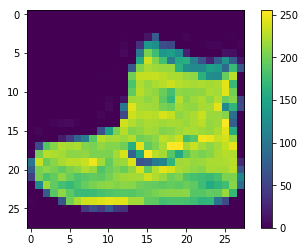

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

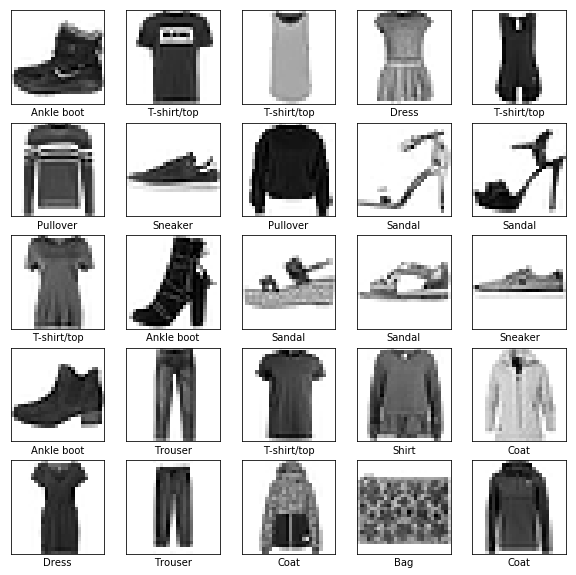

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(130, activation=tf.nn.relu),
    keras.layers.Dense(70, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [93]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [94]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 140us/step - loss: 0.5120 - acc: 0.8134
Epoch 2/3
60000/60000 [==============================] - 8s 130us/step - loss: 0.3721 - acc: 0.8642
Epoch 3/3
60000/60000 [==============================] - 8s 130us/step - loss: 0.3391 - acc: 0.8755


In [95]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 104us/step


0.8677

In [46]:
predictions = model.predict(test_images)

In [47]:
predictions[0]

array([1.3864916e-04, 1.6700119e-08, 1.3443401e-06, 8.0555202e-07,
       4.6804425e-07, 3.7925332e-03, 2.4278957e-06, 5.1683276e-03,
       1.4384087e-05, 9.9088109e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [51]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


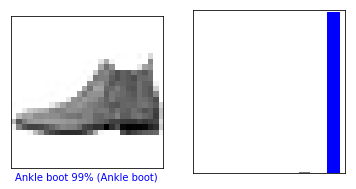

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


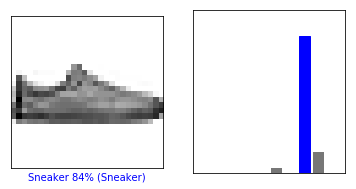

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


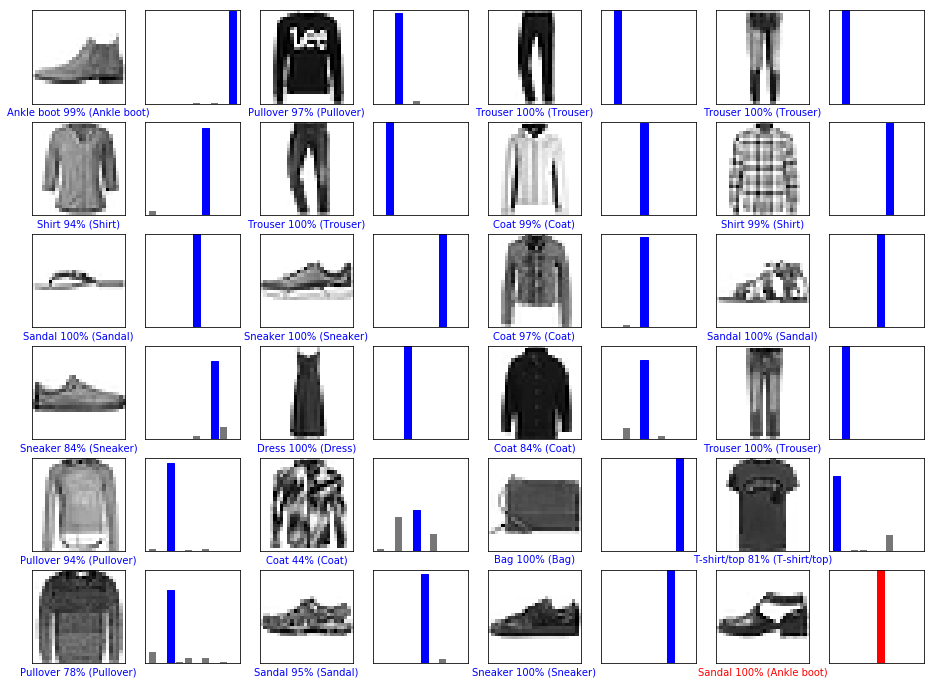

In [56]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [57]:
img = test_images[0]

print(img.shape)


(28, 28)
